# 타이타닉 생존자 예측

## 1. Problem
- 주어진 승객 정보를 통해 타이타닉 사고 시 생존 여부를 예측하는 문제

## 2. Data

- 출처 : [Kaggle : Titanic](https://www.kaggle.com/c/titanic/)

- 데이터 특성
    - survival(생존 여부) :	0 = No, 1 = Yes
    - pclass(좌석 등급) : 1 = 1st, 2 = 2nd, 3 = 3rd
         - 사회적 계층을 대표함(1st = Upper / 2nd = Middle / 3rd = Lower)
    - sex(성별)
    - Age(나이)
        - 1 보다 작을 경우  분수로 나타냄 / 추정치일 경우 xx.5 형식으로 나타냄
    - sibsp(형제 자매 / 배우자 수)
    - parch(부모와 자식 수)
        - 어떤 아이들은 유모와 탑승했으며, 그 결과 0이 있음
    - ticket(티켓 번호)
    - fare(요금)
    - cabin(객실 번호)
    - embarked(정박 항구) : C = Cherbourg, Q = Queenstown, S = Southampton
    

## 3. EDA(Exploratry Data Analysis)

- 데이터의 특성을 살펴본다.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1) 데이터 프레임 만들기

In [2]:
path_train = "./data/titanic/train.csv"

df_train = pd.read_csv(path_train)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2) 데이터 기본 정보 확인

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- 기초 통계 확인

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 결측치 확인
    - 'Age'와 'Cabin', 'Embarked'에 결측값 존재

In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 데이터 탐색 전에 결측값을 치환한다.
    - Age의 경우 중앙값으로 Cabin은 결측치가 많기 때문에 그 자체를 알 수 없는 값으로 정하고 Embarked는 최빈값으로 바꾼다.


In [6]:
df_train['Cabin'] = df_train['Cabin'].fillna('N') # N = None

In [7]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [8]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [10]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

- 'Cabin'은 객실에 대한 값이므로 영문으로 된 객실 구분만 되도록 변환

In [11]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,N,C


- 'Cabin'은 좌석에 대한 특성이므로 앞에 영문글자만 남기고 나머지 숫자를 제거한다.

In [12]:
df_train['Cabin'] = df_train['Cabin'].apply(lambda x: x[0])

In [13]:
df_train['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### 3) 그래프를 통해 데이터 탐색 및 특성마다 상관 관계 확인

- seaborn 팔레트 색상 설정

In [49]:
sns.set_style("darkgrid")

In [50]:
sns.set_palette(sns.color_palette("Set2", 10))

- 남녀 성비 확인

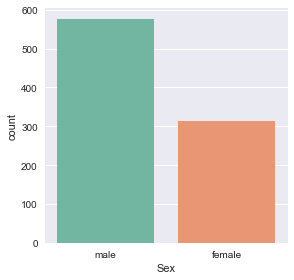

In [16]:
sns.factorplot('Sex', kind='count', data=df_train)

- 좌석 등급에 따라 성비 확인

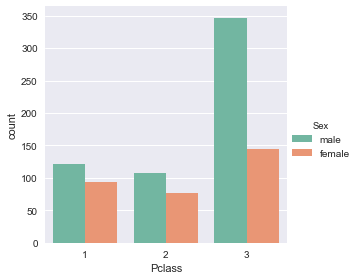

In [17]:
sns.factorplot('Pclass', kind='count', hue='Sex', data=df_train)

- 연령 분포 확인

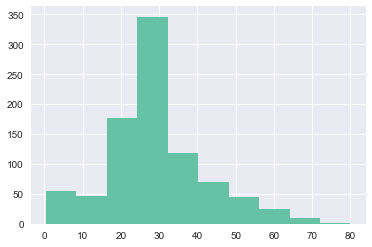

In [18]:
df_train['Age'].hist()

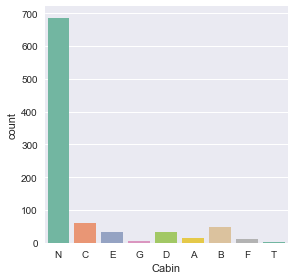

In [19]:
sns.factorplot('Cabin', kind='count', data=df_train)

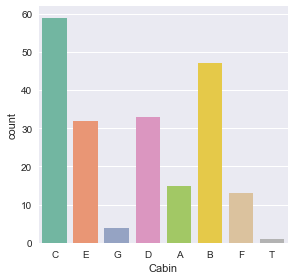

In [20]:
sns.factorplot('Cabin', kind='count', data=df_train.loc[df_train['Cabin']!='N'])

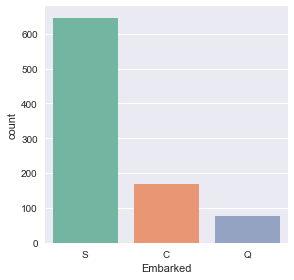

In [21]:
sns.factorplot('Embarked', kind = 'count', data = df_train)

- 각 특성에 대한 생사 여부가 가장 중요한 지표 이므로 그래프로 확인하기 쉽게 'Survivor'를 'No' / 'Yes'로 표시

In [22]:
df_train['Survivor'] = df_train['Survived'].map({0 : 'no', 1: 'yes'})

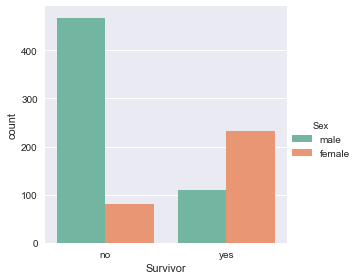

In [23]:
sns.factorplot('Survivor', kind='count', hue='Sex', data=df_train)

- 3등급 좌석일 수록 사망자가 많다.

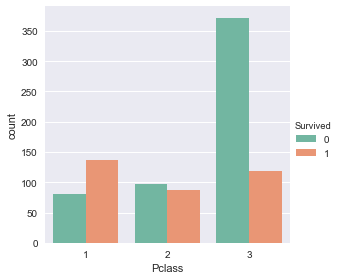

In [24]:
sns.factorplot('Pclass', kind='count', hue='Survived', data=df_train)

- 남자일수록 사망자가 많다.

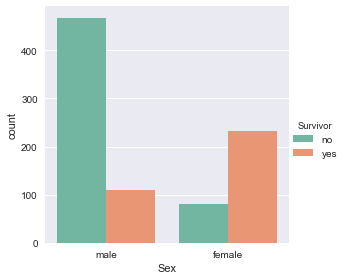

In [25]:
sns.factorplot('Sex', kind='count', hue='Survivor', data=df_train)

- 남녀의 성비에 따른 연령 분포가 비슷하다

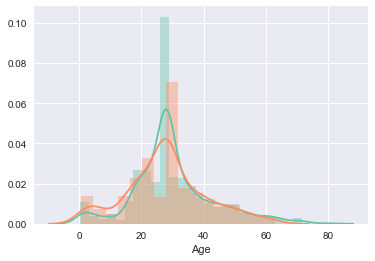

In [26]:
sns.distplot(df_train['Age'].loc[df_train['Sex']=='male'])
sns.distplot(df_train['Age'].loc[df_train['Sex']=='female'])

- 연령에 따른 사망과 상관성이 성별에 따라 다르다.
    - 남성일 경우 나이가 많을 수록 사망률이 높지만, 여성의 경우 나이가 많을 수록 사망률이 낮다.

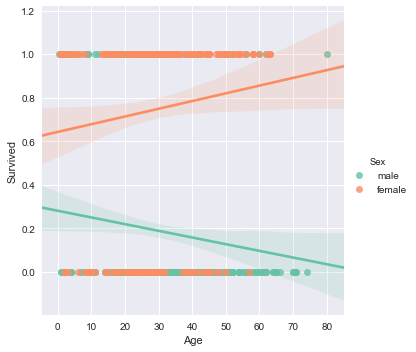

In [27]:
sns.lmplot('Age', 'Survived', hue='Sex', data=df_train)

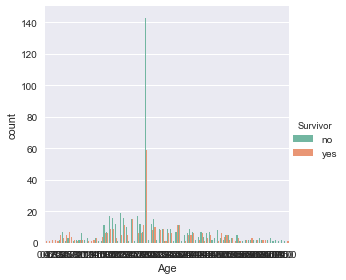

In [28]:
sns.factorplot('Age', kind='count', hue='Survivor', data=df_train)

- 연령에 따른 사망률을 구분해서 보기 위해 16세 미만의 아이들을 따로 본다.

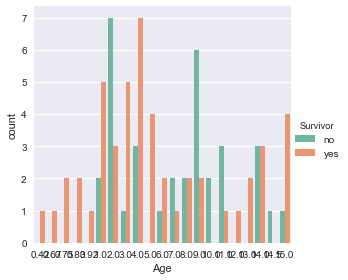

In [29]:
sns.factorplot('Age', kind='count', hue='Survivor', data=df_train.loc[df_train['Age'] < 16])

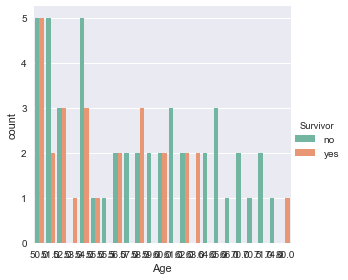

In [36]:
sns.factorplot('Age', kind='count', hue='Survivor', data=df_train.loc[df_train['Age'] >=50 ] )

- 항구와 객실에 따라 사망률이 다르다.

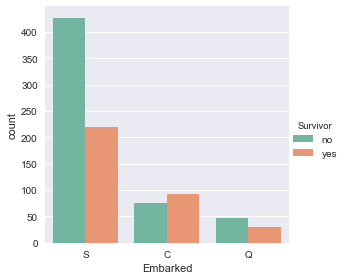

In [113]:
sns.factorplot('Embarked', kind='count', hue='Survivor', data=df_train)

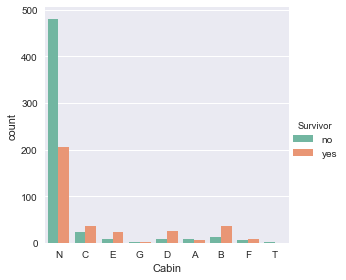

In [114]:
sns.factorplot('Cabin', kind='count', hue='Survivor', data=df_train)

- 16세 이상인 어른의 경우 연령에 따른 사망률과의 관계는 적으며, 남자일 경우 사망률이 높다.

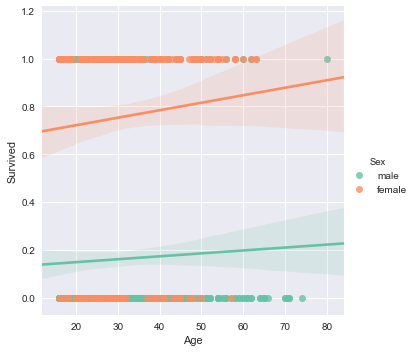

In [115]:
sns.lmplot('Age', 'Survived', hue='Sex', data=df_train.loc[df_train['Age']>=16])

- 여성의 경우 형자/자매가 많을 수록 사망률이 증가하며, 남성의 경우 차이가 없는 경향이 있다.

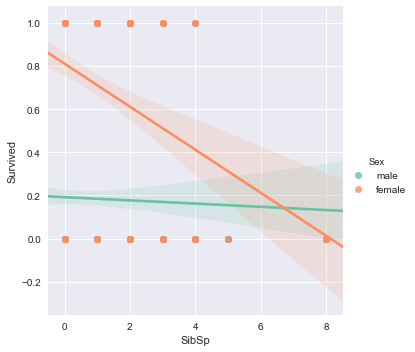

In [116]:
sns.lmplot('SibSp', 'Survived', hue='Sex', data=df_train)

- 부모나 자식이 많은 가족의 경우 남자일 경우 사망률이 낮으며, 여성의 경우 사망률이 높은 경향이 있다.

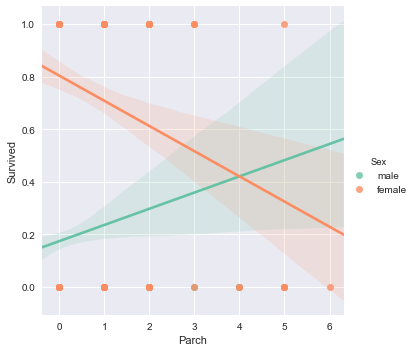

In [117]:
sns.lmplot('Parch', 'Survived', hue='Sex', data=df_train)

- 형제/자매와 부모/자식의 수를 더하여, 가족의 크기라는 특성을 만들어 본다.

In [118]:
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch']

- 가족수 가 많을 수록 여성의 사망률은 감소하는 경향이 있다. 남성의 경우 상관관계가 적음

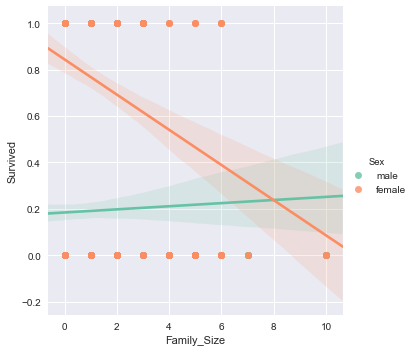

In [119]:
sns.lmplot('Family_Size', 'Survived', hue='Sex', data=df_train)

- 남녀 상관없이 요금의 경우 높을 수록 사망률이 낮다.

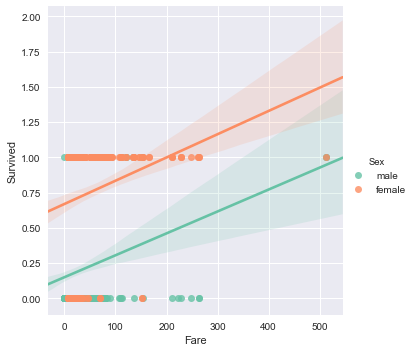

In [120]:
sns.lmplot('Fare', 'Survived', hue='Sex', data=df_train)

In [124]:
df_train['Ticket'].value_counts()

1601                  7
CA. 2343              7
347082                7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
113760                4
347077                4
19950                 4
W./C. 6608            4
LINE                  4
2666                  4
PC 17757              4
4133                  4
17421                 4
113781                4
349909                4
PC 17760              3
110413                3
110152                3
C.A. 31921            3
347742                3
248727                3
29106                 3
363291                3
F.C.C. 13529          3
35273                 3
230080                3
                     ..
349257                1
PC 17596              1
349213                1
315097                1
21440                 1
4579                  1
370377                1
A/5 3902              1
SOTON/O.Q. 3101305    1
28213                 1
349224          

### 4) EDA 결과

- 남성일 경우 사망률이 높으며 여성일 경우 낮은 경향성이 크다.
- 사회적 계층(객실, 요금 등)이 높을 수록 사망률 이 낮다.
- 연령이 낮은 16세 이하 일경우 사망률이 낮으며 성인의 경우 큰 차이는 없다.
- 항구에 따라 사망률의 차이가 있으며, 연령 값의 결측치가 많기 때문에 적절한 값으로 바꿔줄 필요가 있다.

## 4. Data Cleaning and Preprocessing

- EDA를 바탕으로 모델링을 위한 데이터를 준비한다.
- 이때, Test 데이터를 묶어서 함께 처리한다.
    - 학습 데이터와 중복이 없을 경우 나중에 모델링 시 데이터 처리의 수고를 덜을 수 있다.

In [2]:
path_train = "./data/titanic/train.csv"
path_test = "./data/titanic/test.csv"

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

y_train = df_train['Survived']
df_train.drop('Survived', axis=1, inplace=True)

df_combined = df_train.append(df_test)
df_combined.reset_index(inplace=True)
df_combined.drop('index', axis=1, inplace=True)
df_combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_combined.shape

(1309, 11)

- 이름에 나와 있는 특성에 따라 어떤 사람인지 알 수 있다는 것을 확인함
    - ex) Mr, Miss, Master
- 이를 위해서는 이름의 중간에 있는 특징적인 단어만 뽑아서 분류를 해야함

In [4]:
df_combined['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [5]:
name_title = list(set(df_combined['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())))

In [6]:
name_title

['Jonkheer',
 'Master',
 'Sir',
 'Miss',
 'Capt',
 'Mme',
 'Col',
 'Lady',
 'Rev',
 'Mlle',
 'Don',
 'Mrs',
 'Dona',
 'Dr',
 'Ms',
 'Mr',
 'Major',
 'the Countess']

- 사전을 통해 살펴본 name_title
    - Don / Dona: = sir(상류층)
    - Mme : Madame
    - Capt : Captain
    - Lady : 상류층 숙녀
    - the Countess : Countess(여자 백작)
    - mlle : Mademoiselle
    - Jonkheer : 낮은 직급의 귀족
    - Rev : 목사/신부
    - Col : 군인 관련
    - Master : Master는 뜻이 많다.
    - Major : 소령
- 위를 통해 Age를 가늠할 수 있는 데이터를 얻을 수 있음

In [7]:
df_combined['Title'] = df_combined['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [8]:
df_combined.groupby('Title').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1
Col,4,4,4,4,4,4,4,4,4,3,4
Don,1,1,1,1,1,1,1,1,1,0,1
Dona,1,1,1,1,1,1,1,1,1,1,1
Dr,8,8,8,8,7,8,8,8,8,4,8
Jonkheer,1,1,1,1,1,1,1,1,1,0,1
Lady,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2
Master,61,61,61,61,53,61,61,61,61,9,61


- 분류가 너무 많으므로 비슷한 것끼리 묶어서 줄인다.

In [9]:
dict_title={
    'Capt' : 'officer',
    'Col': 'officer',
    'Dr': 'officer',
    'Major': 'officer',
    'Rev': 'officer',
    'Master': 'master',
    'Don' : 'noble',
    'Dona': 'noble',
    'Jonkheer': 'noble',
    'Lady' : 'noble',
    'the Countess' : 'noble',
    'Sir' : 'noble',
    'Miss' : 'miss',
    'Mlle' : 'miss',
    'Mme' : 'mrs',
    'Mrs' : 'mrs',
    'Ms' : 'mrs',
    'Mr' : 'mr',
}

In [10]:
df_combined['Title'] = df_combined['Title'].map(dict_title)

In [11]:
df_combined.groupby('Title').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,,
master,61,61,61,61,53,61,61,61,61,9,61
miss,262,262,262,262,212,262,262,262,262,60,261
mr,757,757,757,757,581,757,757,757,756,135,757
mrs,200,200,200,200,172,200,200,200,200,77,199
noble,6,6,6,6,6,6,6,6,6,4,6
officer,23,23,23,23,22,23,23,23,23,10,23


- Test와 Train 데이터의 중앙값이 섞여 영향을 주지 않도록 구분하여 확인한다.
- 승객의 자리와 성별에 따라 같은 타이틀이라고 하더라도 연령대가 다르다.
    - (Train) 남성 1등급 : 42세 / 남성 3등급 : 26세
    - Master는 중앙값이 10세 이하로 나온다.
        - 그래서 찾아보니 "Master is an English honorific for boys and young men." 라고 나온다.
        - 따라서 데이터의 오류는 아닌 것으로 확인

In [12]:
grouped_df_train = df_combined.head(891).groupby(['Sex', 'Pclass', 'Title']).median()
grouped_df_test = df_combined.iloc[891:].groupby(['Sex', 'Pclass', 'Title']).median()
grouped_df_train

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      miss           369.0  30.0    0.0    0.0   88.25000
              mrs            499.0  40.0    1.0    0.0   79.20000
              noble          658.5  40.5    0.5    0.0   63.05000
              officer        797.0  49.0    0.0    0.0   25.92920
       2      miss           437.5  24.0    0.0    0.0   13.00000
              mrs            439.5  31.5    1.0    0.0   26.00000
       3      miss           372.0  18.0    0.0    0.0    8.75625
              mrs            405.5  31.0    1.0    1.0   15.97500
male   1      master         446.0   4.0    1.0    2.0  120.00000
              mr             463.0  40.0    0.0    0.0   42.40000
              noble          600.0  40.0    0.0    0.0   27.72080
              officer        648.0  51.0    0.0    0.0   35.50000
       2      master         408.0   1.0    1.0    1.0   26.00000
              mr             440.0  31.0    0.0    0.0   13.00000
              officer        358.5  46.5    0.0    0.0   13.00000
       3      master         270.5   4.0    3.5    1.0   28.51250
              mr             472.0  26.0    0.0    0.0    7.89580

In [13]:
grouped_df_test

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      miss          1074.0  32.0    0.0    0.0  158.20835
              mrs           1076.0  48.0    1.0    0.0   63.35830
              noble         1306.0  39.0    0.0    0.0  108.90000
       2      miss          1121.0  19.5    1.0    1.0   24.50000
              mrs           1123.5  29.0    0.0    0.0   26.00000
       3      miss          1090.5  22.0    0.0    0.0    7.87920
              mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      master        1022.0   9.5    1.0    2.0  198.43750
              mr            1102.0  42.0    0.0    0.0   50.24790
              officer       1094.0  53.0    1.0    0.0   81.85830
       2      master        1033.5   5.0    0.5    1.5   27.75000
              mr            1156.0  28.0    0.0    0.0   13.00000
              officer       1048.5  35.5    0.5    0.5   19.50000
       3      master        1173.0   7.0    1.0    1.0   15.24580
              mr            1101.0  25.0    0.0    0.0    7.85420

In [14]:
grouped_df_test.loc['female', 1, 'miss']['Age']

32.0

In [15]:
def fill_age(row, grouped_median):
    
    if row['Sex']== 'female' and row['Pclass'] == 1:
        if row['Title'] == 'miss':
            return grouped_median.loc['female', 1, 'miss']['Age']
        elif row['Title'] == 'mrs':
            return grouped_median.loc['female', 1, 'mrs']['Age']
        elif row['Title'] == 'noble':
            return grouped_median.loc['female', 1, 'noble']['Age']
        elif row['Title'] == 'officer':
            return grouped_median.loc['female', 1, 'officer']['Age']
        
    elif row['Sex']== 'female' and row['Pclass'] == 2:
        if row['Title'] == 'miss':
            return grouped_median.loc['female', 2, 'miss']['Age']
        elif row['Title'] == 'mrs':
            return grouped_median.loc['female', 2, 'mrs']['Age']
        elif row['Title'] == 'noble':
            return grouped_median.loc['female', 2, 'noble']['Age']
        elif row['Title'] == 'officer':
            return grouped_median.loc['female', 2, 'officer']['Age']
        
    elif row['Sex']== 'female' and row['Pclass'] == 3:
        if row['Title'] == 'miss':
            return grouped_median.loc['female', 3, 'miss']['Age']
        elif row['Title'] == 'mrs':
            return grouped_median.loc['female', 3, 'mrs']['Age']
        elif row['Title'] == 'noble':
            return grouped_median.loc['female', 3, 'noble']['Age']
        elif row['Title'] == 'officer':
            return grouped_median.loc['female', 3, 'officer']['Age']
        
    elif row['Sex']== 'male' and row['Pclass'] == 1:
        if row['Title'] == 'master':
            return grouped_median.loc['male', 1, 'master']['Age']
        elif row['Title'] == 'mr':
            return grouped_median.loc['male', 1, 'mr']['Age']
        elif row['Title'] == 'noble':
            return grouped_median.loc['male', 1, 'noble']['Age']
        elif row['Title'] == 'officer':
            return grouped_median.loc['male', 1, 'officer']['Age']
        
    elif row['Sex']== 'male' and row['Pclass'] == 2:
        if row['Title'] == 'master':
            return grouped_median.loc['male', 2, 'master']['Age']
        elif row['Title'] == 'mr':
            return grouped_median.loc['male', 2, 'mr']['Age']
        elif row['Title'] == 'noble':
            return grouped_median.loc['male', 2, 'noble']['Age']
        elif row['Title'] == 'officer':
            return grouped_median.loc['male', 2, 'officer']['Age']   
        
    elif row['Sex']== 'male' and row['Pclass'] == 3:
        if row['Title'] == 'master':
            return grouped_median.loc['male', 3, 'master']['Age']
        elif row['Title'] == 'mr':
            return grouped_median.loc['male', 3, 'mr']['Age']
        elif row['Title'] == 'noble':
            return grouped_median.loc['male', 3, 'noble']['Age']
        elif row['Title'] == 'officer':
            return grouped_median.loc['male', 3, 'officer']['Age']

In [16]:
df_combined.head(891).Age = df_combined.head(891).apply(lambda x: fill_age(x, grouped_df_train) if np.isnan(x['Age']) else x['Age'] , axis=1)

/Users/Eddy/.pyenv/versions/3.5.1/envs/dss/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
df_combined.iloc[891:]['Age'] = df_combined.iloc[891:].apply(lambda x: fill_age(x, grouped_df_test) if np.isnan(x['Age']) else x['Age'] , axis=1)

/Users/Eddy/.pyenv/versions/3.5.1/envs/dss/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_combined.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

- 'Embarked' 결측치는 'S'로 치환

In [19]:
df_combined['Embarked'] = df_combined['Embarked'].fillna('S')

- 'Cabin'의 결측치는 'N'으로 치환하고 나머지는 숫자를 제거하고 앞에 영문 글자만 남긴다.

In [20]:
df_combined['Cabin'] = df_combined['Cabin'].fillna('N') # N = None

In [21]:
df_combined['Cabin'] = df_combined['Cabin'].apply(lambda x : x[0])

- 'Fare'요금은 평균 값으로 치환

In [22]:
df_combined['Fare'] = df_combined['Fare'].fillna(df_combined['Fare'].mean())

In [23]:
df_combined.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [24]:
df_combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,mr


- Name은 Title로 대신함으로 제거한다.

In [25]:
df_combined.drop('Name', axis=1, inplace=True)

- SibSp와 Parch를 사용해 Family Size를 만든다.

In [26]:
df_combined['Family_size'] = df_combined['SibSp'] + df_combined['Parch']

- Ticket 종류에 따라 카테고리로 묶는다. 숫자 앞에 문자가 있을 경우 문자로 묶고, 없는 경우 'D' + 자릿수로 만듬

In [27]:
df_combined['Ticket'] = df_combined['Ticket'].apply(lambda x: x.replace('/', '').replace('.', '').split()[0])

In [28]:
df_combined['Ticket'] = df_combined['Ticket'].apply(lambda x: 'Digit' if x.isdigit() else x)

- Nominal 데이터를 가지고 있는 Cabin, Embarked, Title, Pclass, Ticket 을 Dummy Variable로 만들어 준다.
- Regression을 통해 분류하므로 카테고리형 데이터는 값의 크기 차이가 있는 것이 아니므로 각각의 더미 변수를 만들어 0과 1로 해당 여부를 표시한다. 

In [29]:
titles_dummies = pd.get_dummies(df_combined['Title'], prefix='Title')
df_combined = pd.concat([df_combined, titles_dummies], axis=1)
df_combined.drop('Title', axis=1, inplace=True)
df_combined.shape

(1309, 17)

In [30]:
cabin_dummies = pd.get_dummies(df_combined['Cabin'], prefix='Cabin')
df_combined = pd.concat([df_combined, cabin_dummies], axis=1)
df_combined.drop('Cabin', axis=1, inplace=True)
df_combined.shape

(1309, 25)

In [31]:
embarked_dummies = pd.get_dummies(df_combined['Embarked'], prefix='Embarked')
df_combined = pd.concat([df_combined, embarked_dummies], axis=1)
df_combined.drop('Embarked', axis=1, inplace=True)
df_combined.shape

(1309, 27)

In [32]:
pclass_dummies = pd.get_dummies(df_combined['Pclass'], prefix='Pclass')
df_combined = pd.concat([df_combined, pclass_dummies], axis=1)
df_combined.drop('Pclass', axis=1, inplace=True)
df_combined.shape

(1309, 29)

In [33]:
ticket_dummies = pd.get_dummies(df_combined['Ticket'], prefix='Ticket')
df_combined = pd.concat([df_combined, ticket_dummies], axis=1)
df_combined.drop('Ticket', axis=1, inplace=True)
df_combined.shape

(1309, 65)

- 'Sex'의 경우 0과 1로 표시

In [34]:
df_combined['Sex'] = df_combined['Sex'].map({'male':1, 'female':0})

- 'Family Size'의 경우 대가족과 소규모 가족 그리고 혼자인 그룹으로 나눌 수 있다.

In [35]:
df_combined['Alone'] = df_combined['Family_size'].map(lambda x: 1 if x < 1 else 0)
df_combined['Small_Family'] = df_combined['Family_size'].map(lambda x: 1 if 4 >= x >= 1 else 0)
df_combined['Bag_Family'] = df_combined['Family_size'].map(lambda x: 1 if x > 4 else 0)

In [36]:
df_combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Family_size,Title_master,Title_miss,Title_mr,...,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Alone,Small_Family,Bag_Family
0,1,1,22.0,1,0,7.2500,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,0,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,26.0,0,0,7.9250,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,4,0,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


- 사용하지 않을 변수를 제거한다.

In [37]:
eliminate_features = ['PassengerId']

In [38]:
df_combined.drop(eliminate_features, axis=1, inplace=True)
df_combined.head()

,Sex,Age,SibSp,Parch,Fare,Family_size,Title_master,Title_miss,Title_mr,Title_mrs,...,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Alone,Small_Family,Bag_Family
0,1,22.0,1,0,7.2500,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,38.0,1,0,71.2833,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,35.0,0,0,8.0500,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## 5. 모델링

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import accuracy_score

/Users/Eddy/.pyenv/versions/3.5.1/envs/dss/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Eddy/.pyenv/versions/3.5.1/envs/dss/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### 1) 학습 및 테스트 데이터 만들기

In [88]:
y_train = pd.read_csv(path_train)['Survived']

In [89]:
X_train = df_combined.iloc[:891]
X_test = df_combined.iloc[891:]

In [42]:
X_train.shape, X_test.shape, y_train.shape

((891, 67), (418, 67), (891,))

#### 2) Feature Selection

In [43]:
from sklearn.feature_selection import SelectFromModel

In [44]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [45]:
df_features = pd.DataFrame({'Features' : X_train.columns})
df_features['Importance'] = clf.feature_importances_
df_features.sort_values(by=['Importance'], ascending=True,inplace=True)
df_features.set_index('Features', inplace=True)

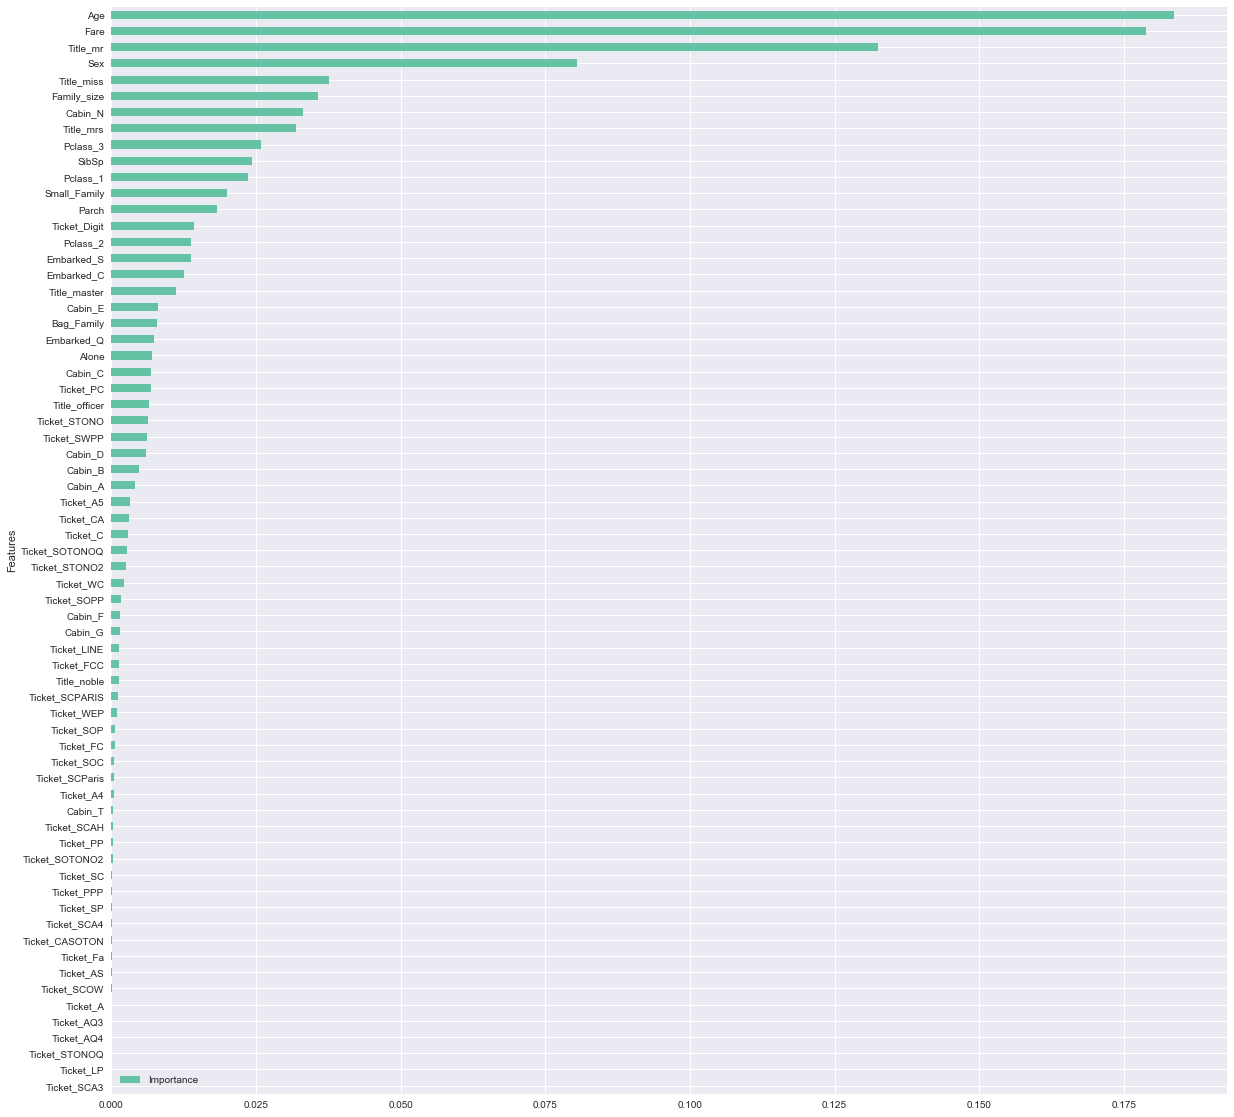

In [51]:
df_features.plot(kind='barh', figsize=(20, 20))

In [52]:
model = SelectFromModel(clf, prefit = True)
X_train_reduced = model.transform(X_train)
X_test_reduced = model.transform(X_test)

In [53]:
X_train_reduced.shape, X_test_reduced.shape

((891, 13), (418, 13))

### 3) Model Selection

####  Logistic Regression

In [54]:
lr = LogisticRegression(random_state=23)

In [55]:
lr_acc = cross_val_score(lr, X_train_reduced, y_train, cv=5, scoring='accuracy')
lr_acc = np.mean(lr_acc)

####  SVM

In [56]:
svc = SVC(random_state=23)

In [57]:
svc_acc = cross_val_score(svc, X_train_reduced, y_train, cv=5, scoring='accuracy')
svc_acc = np.mean(svc_acc)

####  KNN

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn_acc = cross_val_score(knn, X_train_reduced, y_train, cv=5, scoring='accuracy')
knn_acc = np.mean(knn_acc)

####   Gausian Naive Bayes

In [60]:
gs = GaussianNB()

In [61]:
gs_acc = cross_val_score(gs, X_train_reduced, y_train, cv=5, scoring='accuracy')
gs_acc = np.mean(gs_acc)

#### Decision Tree

In [62]:
tr = DecisionTreeClassifier(random_state=23)

In [63]:
tr_acc = cross_val_score(tr, X_train_reduced, y_train, cv=5, scoring='accuracy')
tr_acc = np.mean(tr_acc)

####  Random Forest

In [64]:
rf = RandomForestClassifier(random_state=23)

In [65]:
rf_acc = cross_val_score(rf, X_train_reduced, y_train, cv=5, scoring='accuracy')
rf_acc = np.mean(rf_acc)

####  Gradient Boosting

In [66]:
gbc = GradientBoostingClassifier(random_state=23)

In [67]:
gbc_acc = cross_val_score(gbc, X_train_reduced, y_train, cv=5, scoring='accuracy')
gbc_acc = np.mean(gbc_acc)

#### Multi-Layers Nueral Networks

In [68]:
mlp = MLPClassifier(random_state=23)

In [69]:
mlp_acc = cross_val_score(mlp, X_train_reduced, y_train, cv=10, scoring='accuracy')
mlp_acc = np.mean(mlp_acc)

####  Model Ranking

In [70]:
models = pd.DataFrame({
    'Model' : ['SVM', 'Linear Regression', 'Random Forest', 'Decision Tree',
               'Gradient Boosting Classifier','KNN', 'Gausian Naive Bayes'],
    'Score': [svc_acc, lr_acc, rf_acc, tr_acc, gbc_acc, knn_acc, gs_acc]
})

In [71]:
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Gradient Boosting Classifier,0.833894
2,Random Forest,0.821660
1,Linear Regression,0.812583
3,Decision Tree,0.790117
6,Gausian Naive Bayes,0.786835
0,SVM,0.727365
5,KNN,0.707159


### 4)  Hyper Parameter Tuning

- For Gradient Boosting Classifier

In [72]:
# param_grid = {
#     'n_estimators' : [10, 50, 100, 500],
#     'subsample' : [0.1, 0.3, 0.5, 0.7],
#     'max_features': ['sqrt', 'auto', 'log2'],
#     'learning_rate' : [0.1, 0.01, 0.001],
#     'max_depth' : [4, 6, 8],
#     'min_samples_split': [2, 7, 15],
#     'min_samples_leaf': [1, 5, 15],
# }

- For RandomForest

In [73]:
param_grid = {
    'max_depth' : [4, 6, 8],
    'n_estimators': [10, 50, 100, 500],
    'max_features': ['sqrt', 'auto', 'log2'],
    'min_samples_split': [2, 7, 15],
    'min_samples_leaf': [1, 5, 15],
    'bootstrap': [True, False],
    }

In [74]:
cv = StratifiedKFold(y_train, n_folds=10)

In [77]:
grid_search = GridSearchCV(rf, scoring='accuracy', param_grid=param_grid, cv=cv)

In [78]:
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 1 ..., 1 0], n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=23,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'min_samples_leaf': [1, 5, 15], 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_split': [2, 7, 15], 'max_depth': [4, 6, 8], 'n_estimators': [10, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [79]:
best_params = grid_search.best_params_

### 6. 제출용 데이터 만들기

In [80]:
best_model = RandomForestClassifier(**best_params)

In [81]:
cv_result = cross_val_score(best_model, X_train_reduced, y_train, cv=5, scoring='accuracy' )

In [82]:
np.mean(cv_result)

0.82832029511448924

In [83]:
best_model.fit(X_train_reduced, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [84]:
y_pred = best_model.predict(X_test_reduced)

In [85]:
# lr = LogisticRegression()
# lr.fit(X_train_reduced, y_train)
# y_pred = lr.predict(X_test_reduced)

In [86]:
df_submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": y_pred
})

In [87]:
df_submission.to_csv('./result/submission_Ticket_rf_3rd.csv', index=False)

### 7. 제출 결과
- BaseLine
    - Model : Logistic Regression
    - Score : 0.77990
    
- 1차
  - Features : Ticket 포함 / Person 제거
  - Model : Random Forest
  - Parameters : bootstrap=True, max_depth=8, max_features='sqrt', min_samples_leaf=1, min_samples_split=15, n_estimators=500,
  - File : submission_Ticket_rf_1st.csv
  - Score : 

- 2차
  - Features : Ticket 포함 / Person 제거
  - Model : Gradient Boosting Classification
  - Parameters : criterion='friedman_mse', learning_rate=0.1, max_depth=8, min_samples_leaf=15, min_samples_split=2, n_estimators=50, subsample=0.5
  - Score : 0.77033
  
- 3차
  - Features : Ticket 포함 / Person 제거
  - Model : Random Forest
  - Parameters : bootstrap=True, max_depth=8, max_features='sqrt', min_samples_leaf=5, min_samples_split=15, n_estimators=500
  - Score : 0.78468
  
- 4차
  - Features : Ticket 포함 / Person 포함
  - Model : Random Forest
  - Parameters : bootstrap=True, max_depth=6, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500
  - Score : 0.78468

### References
https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html